In [6]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from sklearn import svm, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, Convolution2D
from keras.layers import MaxPooling2D, AveragePooling2D
import matplotlib.pyplot as plt

In [13]:
def load_mnist(split = 0.05):
    print("Loading data...")
    train = pd.read_csv('train.csv')
    
    X = train.as_matrix()[:,1::]
    y = train.label.as_matrix() 
    
    # Label EDA
    fig = plt.figure(figsize=(3, 3))
    plt.hist(y); plt.title('label distribution')
    
    # Create train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)
    
    return X_train, y_train, X_test, y_test

In [32]:
def train_cnn(X_train, y_train, X_test, y_test):
    # Reshape for Conv. NN
    #X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    #X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

    # Conv. NN
    model = Sequential()
    # add keras guassian noise layer at start
    # visualize filters with noise and without
    # does it act as regulator???
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(192, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    model.summary()
    
    model.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test)
    
    return model, score

In [4]:
def train_cnn2(X_train, y_train, X_test, y_test):
    
    #X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    #X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    
    model = Sequential()

    model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
    model.add(Convolution2D(32, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    model.fit(X_train, y_train, epochs=25, batch_size=32)
    
    score = model.evaluate(X_test, y_test)
    
    return model, score

In [5]:
def kaggle_predict(model):
    # Predict kaggle test data
    test = pd.read_csv("test.csv")
    kaggle_test = test.as_matrix().reshape(test.shape[0],28,28,1)
    pred = model.predict(kaggle_test)
    decoded = np.round(pred * np.asmatrix(range(10)).transpose()).astype(int)
    
    # Save as csv
    output = pd.DataFrame(decoded)
    output.index += 1
    output.index.name = 'ImageId'
    output.to_csv("predictions.csv", header=['Label'])

Loading data...


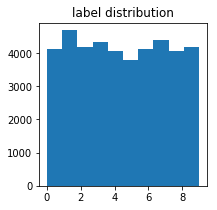

In [12]:
# Load dataset
X_train, y_train, X_test, y_test = load_mnist()

In [67]:
# Normalization
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

C:\Users\dljva\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [68]:
# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [69]:
# Add noise

sigma = 260./255
mu = 0

train_noise = sigma * np.random.randn(X_train.shape[0], 28, 28, 1) + mu
test_noise = sigma * np.random.randn(X_test.shape[0], 28, 28, 1) + mu

X_train = X_train + train_noise
X_test = X_test + test_noise

In [70]:
# One-hot encoding
enc = OneHotEncoder()
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
enc.fit(y_train)
y_train = enc.transform(y_train).todense()
y_test = enc.transform(y_test).todense()

In [65]:
# Train model
model, score = train_cnn2(X_train, y_train, X_test, y_test)
kaggle_predict(model)

C:\Users\dljva\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
C:\Users\dljva\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


Epoch 1/25
39900/39900 [==============================] - 19s - loss: 1.0429    
Epoch 2/25
39900/39900 [==============================] - 19s - loss: 0.7519    
Epoch 3/25
39900/39900 [==============================] - 18s - loss: 0.6685    
Epoch 4/25
39900/39900 [==============================] - 15s - loss: 0.6072    
Epoch 5/25
39900/39900 [==============================] - 20s - loss: 0.5722    
Epoch 6/25
39900/39900 [==============================] - 18s - loss: 0.5350    
Epoch 7/25
39900/39900 [==============================] - 17s - loss: 0.5010    
Epoch 8/25
39900/39900 [==============================] - 17s - loss: 0.4805    
Epoch 9/25
39900/39900 [==============================] - 16s - loss: 0.4556    
Epoch 10/25
39900/39900 [==============================] - 18s - loss: 0.4325    
Epoch 11/25
39900/39900 [==============================] - 19s - loss: 0.4163    
Epoch 12/25
39900/39900 [==============================] - 20s - loss: 0.4064    
Epoch 13/25
39900/39900 [

- TODO: visualize conv. activations
- TODO: try only noisy test set
- TODO: check manual classification
- Try other architecture with batch size = 32

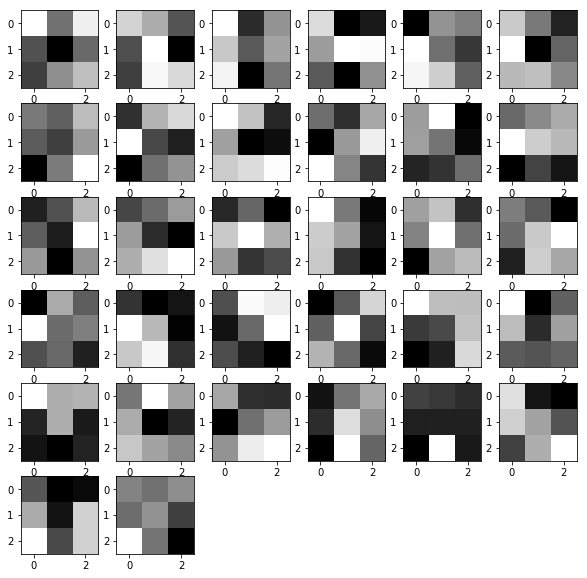

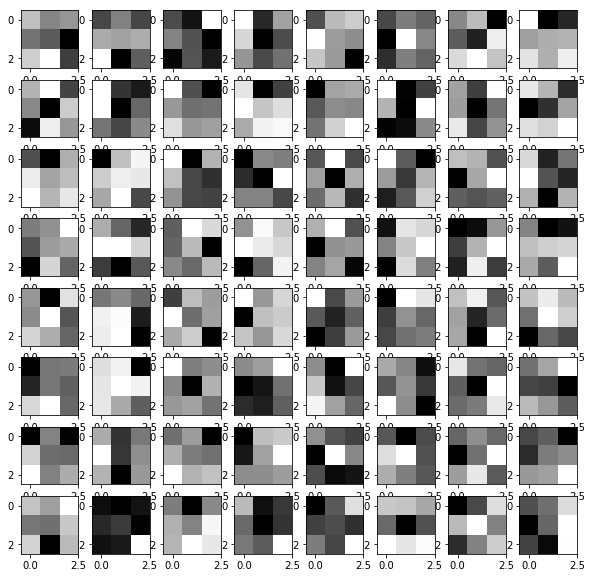

In [44]:
#%% Visualize conv filters
for layer in model.layers:
    # Process convolutional layers
    if isinstance(layer, keras.layers.convolutional.Conv2D):
        # visualize the weights
        fig=plt.figure(figsize=(10, 10))
        size = np.sqrt(layer.filters).round().astype(int)
        
        for i in range(layer.filters):
            w = layer.get_weights()[0][:,:,0,i]
            fig.add_subplot(size, size, i+1)
            plt.imshow(w, cmap='gray')
        plt.show()

- Gaussian noise sigma = 30 -> improves from 0.98471 to 0.98514 (acts as regularizer)
- Gaussian noise sigma = 50 -> 0.98471 = same as regular network performance
- Gaussian noise sigma = 80 -> 0.98128 = slight decrease
- Gaussian noise sigma = 100 -> 0.97400 = greater decrease
- Gaussian noise sigma = 120 -> 0.96285
- Gaussian noise sigma = 140 -> 0.94900
- Gaussian noise sigma = 160 -> 0.93914
- Gaussian noise sigma = 180 -> 0.92528
- Gaussian noise sigma = 200 -> 0.94100
- Gaussian noise sigma = 220 -> 0.94257
- Gaussian noise sigma = 240 -> 0.92671

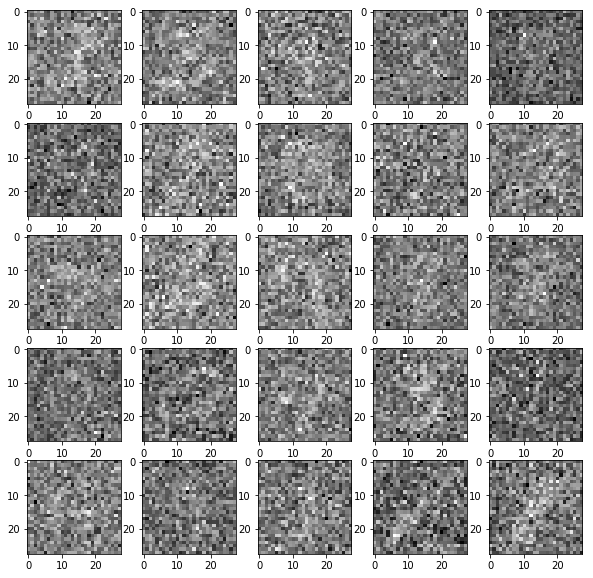

In [71]:
import numpy as np
import matplotlib.pyplot as plt

#fig, ax = plt.subplots()
#ax.imshow(X_train[20,:,:,0], cmap='gray')
#plt.show()

# plot the first 25 numbers
fig=plt.figure(figsize=(10, 10))

for i in range(25):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(X_train[i,:,:,0], cmap='gray')
plt.show()